In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### DEFINE PROBLEMS :
- Meningkatkan Penjualan SEPHORA E-Commerce melalui Brand SEPHORA COLLECTION yang berfokus pada Online Store.

### EDA GOALS :
- Mencari tahu apakah Penjualan SEPHORA pada Brand SEPHORA COLLECTION sudah berfokus pada Online Store atau belum.
- Mencari tahu category apa saja yang paling diminati, cukup diminati, dan kurang diminati pada Brand SEPHORA COLLECTION.
- Mencari tahu cara meningkatkan penjualan Brand SEPHORA COLLECTION untuk setiap category, dan mempertahankan category-category yang sudah cukup baik.
- Mencari tahu cara meningkatkan rating untuk category yang masih dibawah rata-rata.

In [2]:
df = pd.read_csv('sephora.csv')
df

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
0,2218774,Acqua Di Parma,Fragrance,Blu Mediterraneo MINIATURE Set,5 x 0.16oz/5mL,4.0,4,3002,66.0,75.0,...,True,online only,no options,This enchanting set comes in a specially handc...,Suggested Usage:-Fragrance is intensified by t...,Arancia di Capri Eau de Toilette: Alcohol Dena...,1,0,0,0
1,2044816,Acqua Di Parma,Cologne,Colonia,0.7 oz/ 20 mL,4.5,76,2700,66.0,66.0,...,True,online only,- 0.7 oz/ 20 mL Spray - 1.7 oz/ 50 mL Eau d...,An elegant timeless scent filled with a fresh-...,no instructions,unknown,1,0,0,0
2,1417567,Acqua Di Parma,Perfume,Arancia di Capri,5 oz/ 148 mL,4.5,26,2600,180.0,180.0,...,True,online only,- 1oz/30mL Eau de Toilette - 2.5 oz/ 74 mL E...,Fragrance Family: Fresh Scent Type: Fresh Citr...,no instructions,Alcohol Denat.- Water- Fragrance- Limonene- Li...,1,0,0,0
3,1417617,Acqua Di Parma,Perfume,Mirto di Panarea,2.5 oz/ 74 mL,4.5,23,2900,120.0,120.0,...,True,online only,- 1 oz/ 30 mL Eau de Toilette Spray - 2.5 oz/...,Panarea near Sicily is an an island suspended ...,no instructions,unknown,1,0,0,0
4,2218766,Acqua Di Parma,Fragrance,Colonia Miniature Set,5 x 0.16oz/5mL,3.5,2,943,72.0,80.0,...,True,online only,no options,The Colonia Miniature Set comes in an iconic A...,Suggested Usage:-Fragrance is intensified by t...,Colonia: Alcohol Denat.- Water- Fragrance- Lim...,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


In [3]:
print(df.shape)

(9168, 21)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9168 entries, 0 to 9167
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      9168 non-null   int64  
 1   brand                   9168 non-null   object 
 2   category                9168 non-null   object 
 3   name                    9168 non-null   object 
 4   size                    9168 non-null   object 
 5   rating                  9168 non-null   float64
 6   number_of_reviews       9168 non-null   int64  
 7   love                    9168 non-null   int64  
 8   price                   9168 non-null   float64
 9   value_price             9168 non-null   float64
 10  URL                     9168 non-null   object 
 11  MarketingFlags          9168 non-null   bool   
 12  MarketingFlags_content  9168 non-null   object 
 13  options                 9168 non-null   object 
 14  details                 9168 non-null   

## DESCRIPTIVE ANALYSIS, HANDLING OUTLIERS, AND MISSING VALUES

### Descriptive Analyis

In [5]:
df.describe().T

# Memperlihatkan perhitungan statistik dari data yang kolomnya bertipe numerikal

,count,mean,std,min,25%,50%,75%,max
id,9168.0,1.962952e+06,385971.360901,50.0,1819453.0,2072353.5,2230591.0,2359685.0
rating,9168.0,3.990020e+00,1.007707,0.0,4.0,4.0,4.5,5.0
number_of_reviews,9168.0,2.821392e+02,890.642028,0.0,10.0,46.0,210.0,19000.0
love,9168.0,1.627859e+04,42606.514471,0.0,1600.0,4800.0,13800.0,1300000.0
price,9168.0,5.006324e+01,47.164989,2.0,24.0,35.0,59.0,549.0
value_price,9168.0,5.182359e+01,49.459020,2.0,25.0,35.0,60.0,549.0
online_only,9168.0,2.348386e-01,0.423921,0.0,0.0,0.0,0.0,1.0
exclusive,9168.0,2.647251e-01,0.441211,0.0,0.0,0.0,1.0,1.0
limited_edition,9168.0,9.184119e-02,0.288817,0.0,0.0,0.0,0.0,1.0
limited_time_offer,9168.0,3.272251e-04,0.018087,0.0,0.0,0.0,0.0,1.0


In [6]:
df.describe(include = "O")

# Memperlihatkan perhitungan statistik dari data yang kolomnya bertipe object
# Dapat dilihat bahwa top brand dari Sephora E-Commerce adalah SEPHORA COLLECTION dengan catergory Perfume

,brand,category,name,size,URL,MarketingFlags_content,options,details,how_to_use,ingredients
count,9168,9168,9168,9168,9168,9168,9168,9168,9168,9168
unique,324,143,9106,1623,9168,10,564,8839,6497,6962
top,SEPHORA COLLECTION,Perfume,Blush,no size,https://www.sephora.com/product/green-tea-hydr...,0,no options,no details,no instructions,unknown
freq,496,665,4,3161,1,4786,8377,14,1573,1630


In [7]:
dfsephora = df[df['brand'] == "SEPHORA COLLECTION"]
dfsephora

# Mengelompokkan menjadi DataFrame dengan Brand "SEPHORA COLLECTION" saja

,id,brand,category,name,size,rating,number_of_reviews,love,price,value_price,...,MarketingFlags,MarketingFlags_content,options,details,how_to_use,ingredients,online_only,exclusive,limited_edition,limited_time_offer
7030,1802677,SEPHORA COLLECTION,Face Wipes,Cleansing & Exfoliating Wipes,25 Wipes,4.5,3000,224700,8.0,8.0,...,True,exclusive,no options,What it is: A collection of cleansing and exf...,Suggested Usage:Cleansing Wipes: -Gently wipe ...,-Coconut Water Extract.\n\n Water- Caprylic/C...,0,1,0,0
7031,1973700,SEPHORA COLLECTION,Face Masks,Face Mask,1 Mask,4.5,1000,117100,6.0,6.0,...,True,exclusive,no options,To redeem your offer: \n1. SELECT FOUR MASKS: ...,Suggested Usage:-Unfold the mask and peel off ...,-Aloe Vera Extract of natural origin: Helps s...,0,1,0,0
7032,1118033,SEPHORA COLLECTION,Eyeliner,Retractable Waterproof Eyeliner,no size,4.5,6000,153900,13.0,13.0,...,True,exclusive,no options,What it is:A long-lasting- waterproof eyeliner...,Suggested Usage:-Apply to the lash line of the...,Cyclopentasiloxane- Iron Oxides (CI 77499)- Sy...,0,1,0,0
7033,1931005,SEPHORA COLLECTION,Brush Sets,Ready To Roll Brush Set,no size,4.5,356,123400,70.0,195.0,...,True,exclusive,no options,What it is: A set of 10 brushes curated to inc...,no instructions,unknown,0,1,0,0
7034,2222099,SEPHORA COLLECTION,Foundation,10 HR Wear Perfection Foundation,0.84 oz/ 25 mL,4.0,3000,128400,20.0,20.0,...,True,exclusive,no options,What it is: A weightless foundation with build...,Suggested Usage:\nHow to choose the right foun...,Water- Dimethicone- Isohexadecane- Dimethicone...,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9163,2208502,SEPHORA COLLECTION,Face Masks,The Rose Gold Mask,no size,2.0,15,6200,6.0,6.0,...,True,limited edition · exclusive,no options,What it is: A limited-edition- nurturing and h...,Suggested Usage:-Unfold the mask.-Apply the ma...,-Rose Quartz Extract: Hydrates dry skin. Aqua...,0,1,1,0
9164,2298909,SEPHORA COLLECTION,Lip Sets,Give Me Some Sugar Colorful Gloss Balm Set,3 x 0.32 oz/ 9 g,0.0,0,266,15.0,27.0,...,True,exclusive,no options,What it is: A set of three bestselling Colorfu...,Suggested Usage:-Apply directly to lips using ...,Colorful Gloss Balm Wanderlust: Hydrogenated P...,0,1,0,0
9165,2236750,SEPHORA COLLECTION,Tinted Moisturizer,Weekend Warrior Tone Up Cream,0.946 oz/ 28 mL,0.0,0,445,16.0,16.0,...,True,exclusive,no options,What it is: A weightless complexion booster- i...,Suggested Usage:-Use this product as the last ...,Aqua (Water)- Dimethicone- Isohexadecane- Poly...,0,1,0,0
9166,50,SEPHORA COLLECTION,no category,Gift Card,no size,5.0,46,0,50.0,50.0,...,False,0,no options,What it is:- Available in denominations of $10...,no instructions,unknown,0,0,0,0


#### Keterangan
- id : ID Produk
- brand : Brand dari Produk SEPHORA
- category : Kategori dari Produk SEPHORA
- name : Nama dari Produk
- size : Ukuran dari Produk
- rating : Nilai yang diberikan oleh Customers
- number_of_reviews : Total Review yang diberikan oleh Customers tiap Barang
- love : Berapa banyak orang yang suka dengan produk ini
- value_price : Harga barang sebelum diskon
- price : Harga barang yang terjual
- MarketingFlags : Iklan Marketing dengan Bendera/Baliho
- MarketingFlags_content : Jenis Iklan Baliho
- options : Pilihan
- details : Detail dari Produk
- how_to_use : Cara penggunaan Produk
- ingredients : Bahan-bahan/Isi dari Produk
- online_only : Ada di Online Store atau tidak
- exclusive : Barang Eksklusif atau tidak
- limited_edition : Barang yang Limited Edition atau tidak
- limited_time_offer : Barang yang Limited Time Offer atau tidak

In [8]:
dfsephora.corr().T

# Berdasarkan korelasi yang dilakukan, ada beberapa keterkaitan antara kolom yang mendekati nilai 1 yaitu :
# antara kolom number_of_reviews dan love hal ini dikarenakan jumlah review sangat berdampak dengan seberapa 
# suka orang dengan kategory barang tersebut (makin banyak yang review, banyak yang suka dengan barang tersebut). 
#
# kemudian kolom MarketingFlags dengan exclusive, untuk hal ini menurut saya tidak ada keterkaitan antara MarketingFlags
# dengan exclusive.
# 
# kemudian kolom price dan value_price hal ini dikarenakan value_price berdasarkan harga sebelum di diskon, jadi harga
# awal atau value_price sangat bergantung dengan price.

,id,rating,number_of_reviews,love,price,value_price,MarketingFlags,online_only,exclusive,limited_edition,limited_time_offer
id,1.000000,-0.013982,-0.266032,-0.172881,-0.123911,-0.109649,0.309930,0.039538,0.222330,0.096287,NaN
rating,-0.013982,1.000000,0.125883,0.147082,0.023946,0.033810,0.159534,-0.004441,0.128033,0.019885,NaN
number_of_reviews,-0.266032,0.125883,1.000000,0.872225,-0.081473,-0.073178,0.036920,-0.057968,0.052405,-0.112549,NaN
love,-0.172881,0.147082,0.872225,1.000000,-0.011374,0.037814,0.060755,-0.058944,0.072955,-0.051015,NaN
price,-0.123911,0.023946,-0.081473,-0.011374,1.000000,0.890645,-0.088015,-0.035750,-0.105599,0.085117,NaN
value_price,-0.109649,0.033810,-0.073178,0.037814,0.890645,1.000000,-0.054186,-0.021764,-0.071190,0.056499,NaN
MarketingFlags,0.309930,0.159534,0.036920,0.060755,-0.088015,-0.054186,1.000000,0.049402,0.839866,0.074535,NaN
online_only,0.039538,-0.004441,-0.057968,-0.058944,-0.035750,-0.021764,0.049402,1.000000,-0.095546,0.055452,NaN
exclusive,0.222330,0.128033,0.052405,0.072955,-0.105599,-0.071190,0.839866,-0.095546,1.000000,0.032850,NaN
limited_edition,0.096287,0.019885,-0.112549,-0.051015,0.085117,0.056499,0.074535,0.055452,0.032850,1.000000,NaN


### Handling Outliers

In [9]:
outliers = []
def cek_outlier(data):
    sorted(data)
    q1, q3 = np.percentile(data, [25,75])
    iqr = q3-q1
    lower_fence = q1 - (1.5 * iqr)
    upper_fence = q3 + (1.5 * iqr)
    for i in data:
        if i < lower_fence or i > upper_fence:
            outliers.append(i)
    return outliers

# Rumus untuk menghitung Outliers (Include Q1, Q3, IQR, Lower Fence, Upper Fence)

In [10]:
# Pengecekan Outliers Rating
outliers = []
cek_outlier(dfsephora['rating'])
outliersrating = pd.DataFrame(outliers, columns = ["Outliers Rating"])
outliersrating

# Berdasarkan pengecekan Outliers Rating, dapat dilihat bahwa ada 2 nilai outliers yaitu nilai 0 dan 1.5
# saya memilih untuk mengabaikan dari hasil ini dikarenakan kolom ini adalah rating yang diberikan oleh customers
# Tidak dilakukan pengubahan data terhadap Outliers Rating

,Outliers Rating
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0


In [11]:
# Pengecekan Outliers love
outliers = []
cek_outlier(dfsephora['love'])
outlierslove = pd.DataFrame(outliers, columns = ["Outliers Love"])
outlierslove
# Berdasarkan pengecekan Outliers love, saya juga memilih untuk mengabaikan hasil dari outliers ini dikarenakan
# kolom love ini adalah jumlah dari orang yang suka terhadap produk tersebut.
# Tidak dilakukan pengubahan data terhadap Outliers Love

,Outliers Love
0,224700
1,117100
2,153900
3,123400
4,128400
5,55700
6,628100
7,100200
8,40400
9,168600


In [12]:
# Pengecekan Outliers Price
outliers = []
cek_outlier(dfsephora['price'])
outliersprice = pd.DataFrame(outliers, columns = ["Outliers Price"])
outliersprice
# Berdasarkan pengecekan Outliers Price, saya memilih untuk mengabaikan dari hasil ini dikarenakan 
# kolom ini adalah harga barang yang dijual
# Tidak dilakukan pengubahan data terhadap Outliers Price

,Outliers Price
0,70.0
1,58.0
2,45.0
3,68.0
4,69.0
5,40.0
6,42.0
7,60.0
8,68.0
9,50.0


In [13]:
# Pengecekan Outliers Value_Price
outliers = []
cek_outlier(dfsephora['value_price'])
outliersvalueprice = pd.DataFrame(outliers, columns = ["Outliers Value_Price"])
outliersvalueprice
# Berdasarkan pengecekan Outliers Price, saya memilih untuk mengabaikan dari hasil ini dikarenakan 
# kolom ini adalah harga barang sebelum didiskon
# Tidak dilakukan pengubahan data terhadap Outliers Value_Price

,Outliers Value_Price
0,195.0
1,58.0
2,117.0
3,68.0
4,69.0
5,79.0
6,42.0
7,60.0
8,68.0
9,50.0


### Pengecekan Missing Values

In [14]:
dfsephora.isna().sum()
# Tidak ada data missing values pada DataFrame Sephora, 
# sehingga tidak ada yang perlu di drop/di handling terhadap missing values

id                        0
brand                     0
category                  0
name                      0
size                      0
rating                    0
number_of_reviews         0
love                      0
price                     0
value_price               0
URL                       0
MarketingFlags            0
MarketingFlags_content    0
options                   0
details                   0
how_to_use                0
ingredients               0
online_only               0
exclusive                 0
limited_edition           0
limited_time_offer        0
dtype: int64

## EXPLORATORY DATA ANALYSIS

### Analisis Data

In [15]:
kotak = []
for i in dfsephora['category'].unique():
    kotak.append(i)
    
totalkotak = dfsephora['category'].nunique()

print(totalkotak)
print(kotak,end="")

# Untuk mengecek ada berapa total category yang dimiliki oleh SEPHORA COLLECTION. Total ada 92 kategori.

92
['Face Wipes', 'Face Masks', 'Eyeliner', 'Brush Sets', 'Foundation', 'Lipstick', 'Eyebrow', 'Face Oils', 'Face Serums', 'False Eyelashes', 'Eye Masks', 'Face Sets', 'Eyeshadow', 'Concealer', 'Eye Palettes', 'Eye Creams & Treatments', 'Face Brushes', 'Sheet Masks', 'Makeup Palettes', 'Hand Cream & Foot Cream', 'Lip Gloss', 'Lip Balm & Treatment', 'Hair Removal', 'Eye Brushes', 'Facial Rollers', 'Lip Sets', 'Value & Gift Sets', 'Moisturizers', 'Lip Liner', 'Makeup Removers', 'Beauty Supplements', 'Self Tanners', 'Face Primer', 'Lip Stain', 'Face Wash & Cleansers', 'Hair Masks', 'Nail', 'Hair Styling Products', 'Mascara', 'Brush Cleaners', 'Facial Peels', 'no category', 'Blush', 'Night Creams', 'Eye Primer', 'Bronzer', 'Facial Cleansing Brushes', 'Eye Sets', 'Tinted Moisturizer', 'Highlighter', 'Color Correct', 'Sponges & Applicators', 'Spa Tools', 'Eyelash Curlers', 'Hair Brushes & Combs', 'Makeup Bags & Travel Cases', 'Lip Balms & Treatments', 'Hair Accessories', 'Blemish & Acne Trea

In [16]:
mean1 = dfsephora.groupby(dfsephora['category']).mean()
mean1["rating"]
rating = mean1["rating"].to_frame()
rating

# Untuk mengekstrak nilai rating tiap-tiap category berdasarkan rata-rata

,rating
category,
Accessories,3.000000
Anti-Aging,4.000000
Bath Soaks & Bubble Bath,3.500000
Beauty Supplements,3.307692
Blemish & Acne Treatments,3.100000
...,...
Tinted Moisturizer,2.000000
Toners,4.500000
Tweezers & Eyebrow Tools,4.666667


In [17]:
sum1 = dfsephora.groupby(dfsephora['category']).sum()
sum1["number_of_reviews"]
review = sum1["number_of_reviews"].to_frame()
review

# Untuk mengekstrak nilai number_of_reviews tiap-tiap category berdasarkan total review

,number_of_reviews
category,
Accessories,16
Anti-Aging,91
Bath Soaks & Bubble Bath,11
Beauty Supplements,281
Blemish & Acne Treatments,1089
...,...
Tinted Moisturizer,239
Toners,40
Tweezers & Eyebrow Tools,516


In [18]:
sum1 = dfsephora.groupby(dfsephora['category']).sum()
sum1["love"]
love = sum1["love"].to_frame()
love

# Untuk mengekstrak nilai love tiap-tiap category berdasarkan total review

,love
category,
Accessories,3100
Anti-Aging,11200
Bath Soaks & Bubble Bath,2100
Beauty Supplements,44272
Blemish & Acne Treatments,37744
...,...
Tinted Moisturizer,15945
Toners,4700
Tweezers & Eyebrow Tools,35000


In [19]:
ratereview = pd.concat([rating,review,love], axis=1)
ambil = ratereview.sort_values("number_of_reviews",ascending=False)
ambil
# Untuk menggabungkan menjadi dataframe nilai rating dan number_of_reviews pada category dan kemudian di urutkan berdasarkan
# number_of_reviews

,rating,number_of_reviews,love
category,,,
Eyeliner,4.000000,16687,661499
Lipstick,3.750000,13628,1108400
Foundation,4.083333,7830,382400
Face Brushes,3.988889,6122,535917
Face Masks,3.926471,5591,487400
...,...,...,...
Hair Products,4.500000,11,2300
Bath Soaks & Bubble Bath,3.500000,11,2100
Conditioner,2.000000,9,349


In [20]:
ambil.describe().T
# dapat dilihat rata-rata rating berdasarkan tiap category adalah 3.820865 dan rata-rata number_of_reviews berdasarkan
# tiap category adalah 1316.25

,count,mean,std,min,25%,50%,75%,max
rating,92.0,3.820865,0.734956,0.0,3.50,4.0,4.257812,5.0
number_of_reviews,92.0,1316.250000,2550.083638,0.0,111.25,477.5,1133.000000,16687.0
love,92.0,95885.782609,164969.624472,0.0,12650.00,37622.0,90775.000000,1108400.0


#### Klasifikasi
Saya membagi 4 klasifikasi berdasarkan sebagai berikut :
- Klasifikasi 1 (Perfect) = Nilai Rating diatas rata-rata Rating & Nilai number_of_reviews diatas rata-rata number_of_reviews
- Klasifikasi 2 (Top) = Nilai Rating dibawah rata-rata Rating & Nilai number_of_reviews diatas rata-rata number_of_reviews
- Klasifikasi 3 (Great) = Nilai Rating diatas rata-rata Rating & Nilai number_of_reviews dibawah rata-rata number_of_reviews
- Klasifikasi 4 (Fair) = Nilai Rating dibawah rata-rata Rating & Nilai number_of_reviews dibawah rata-rata number_of_reviews

In [21]:
# Diambil number_of_reviews yang dibawah rata-rata adalah category yang kurang diminati oleh Customers
ambil[ambil["number_of_reviews"] < 1316.250000]
# Ada 71 category yang kurang diminati oleh Customers dari 92 total category

,rating,number_of_reviews,love
category,,,
Eye Brushes,3.518519,1293,214622
Hair Accessories,3.416667,1196,41500
Eyeshadow,3.750000,1112,184100
Highlighter,4.071429,1098,90200
Blemish & Acne Treatments,3.100000,1089,37744
...,...,...,...
Hair Products,4.500000,11,2300
Bath Soaks & Bubble Bath,3.500000,11,2100
Conditioner,2.000000,9,349


In [22]:
ambil[ambil["number_of_reviews"] > 1316.250000]
# Berikut adalah 21 category yang paling diminati oleh para Customers

,rating,number_of_reviews,love
category,,,
Eyeliner,4.000000,16687,661499
Lipstick,3.750000,13628,1108400
Foundation,4.083333,7830,382400
Face Brushes,3.988889,6122,535917
Face Masks,3.926471,5591,487400
Brush Cleaners,4.300000,4773,296600
False Eyelashes,3.906250,4090,384800
Lip Gloss,4.500000,4088,279300
Makeup Removers,4.062500,3576,111691


In [23]:
perfect = ambil.loc[(ambil['rating'] >= 3.820865) & (ambil['number_of_reviews'] > 1316.250000)]
perfect
# perfect.shape # ada 17 category yang masuk dalam klasifikasi 1 (Top)
# Berikut adalah category Klasifikasi 1 (Top), category yang paling diminati oleh Customers dan memiliki rating yang diatas
# rata-rata

,rating,number_of_reviews,love
category,,,
Eyeliner,4.000000,16687,661499
Foundation,4.083333,7830,382400
Face Brushes,3.988889,6122,535917
Face Masks,3.926471,5591,487400
Brush Cleaners,4.300000,4773,296600
False Eyelashes,3.906250,4090,384800
Lip Gloss,4.500000,4088,279300
Makeup Removers,4.062500,3576,111691
Face Wipes,4.281250,3491,224700


In [24]:
top = ambil.loc[(ambil['rating'] <= 3.820865) & (ambil['number_of_reviews'] > 1316.250000)]
top
# Berikut adalah category Klasifikasi 2 (top), category yang nilai ratingnya dibawah rata-rata dan nilai number_of_reviews 
# datas rata-rata. Keempat category ini dapat diimprove sehingga dapat meningkatkan penjualan di SEPHORA karena category 
# ini cukup diminati oleh para Customers.

,rating,number_of_reviews,love
category,,,
Lipstick,3.750000,13628,1108400
Facial Cleansing Brushes,2.833333,2339,53529
Mascara,3.583333,2119,46057
Face Primer,3.583333,2106,58700


In [25]:
great = ambil.loc[(ambil['rating'] >= 3.820865) & (ambil['number_of_reviews'] < 1316.250000)]
great
# great.shape # ada 42 category yang rating diatas rata-rata namun memiliki number_of_reviews yang dibawah rata-rata
# Berikut adalah category Klasifikasi 3 (Great), category ini memiliki rating diatas rata-rata, namun peminatnya berdasarkan
# review kurang banyak, sehingga perlu di improve dari segi penjualannya.

,rating,number_of_reviews,love
category,,,
Highlighter,4.071429,1098,90200
Moisturizers,3.833333,1057,61200
Brush Sets,4.321429,1053,325100
Nail,4.166667,1048,95200
Bronzer,4.333333,1028,60200
Self Tanners,4.500000,969,23000
Body Lotions & Body Oils,4.000000,917,25000
Color Correct,4.000000,896,51200
Eye Masks,3.900000,872,64800


In [26]:
fair = ambil.loc[(ambil['rating'] <= 3.820865) & (ambil['number_of_reviews'] < 1316.250000)]
fair
# fair.shape # ada 29 category yang rating dibawah rata-rata dan number_of_reviews dibawah rata-rata
# Berikut category Klasifikasi 4 (fair) yaitu category yang nilai ratingnya dibawah rata-rata dan nilai number_of_reviews 
# dibawah rata-rata

,rating,number_of_reviews,love
category,,,
Eye Brushes,3.518519,1293,214622
Hair Accessories,3.416667,1196,41500
Eyeshadow,3.750000,1112,184100
Blemish & Acne Treatments,3.100000,1089,37744
Sponges & Applicators,3.611111,1077,140904
Lip Balms & Treatments,3.000000,929,51400
Setting Spray & Powder,3.666667,819,33300
Hair Removal,3.000000,551,37500
Hair Masks,3.500000,529,41400


### Visualizing Data

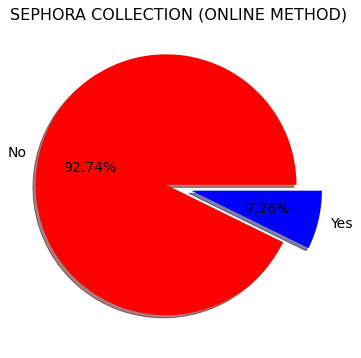

In [27]:
onlinesephora = pd.crosstab(index=dfsephora['brand'], columns = dfsephora['online_only'])
onlinesephora
nama = ["No", "Yes"]
plt.figure(figsize=(10,6))
plt.pie(onlinesephora.loc["SEPHORA COLLECTION"], labels=nama, 
        colors =["r","b"], autopct = '%1.2f%%', shadow=True,
        textprops={
           'size' : 14,
           'color' : 'black'
       }, explode = (0.1, 0.1))
plt.title("SEPHORA COLLECTION (ONLINE METHOD)", size = 16)
plt.show()
# Dapat dilihat disini, bahwa SEPHORA COLLECTION memiliki penjualan yang Online hanya 7,26% dan yang tidak dijual secara
# online ada 92,74%. Sehingga perlu peningkatan pada online method di brand SEPHORA COLLECTION.

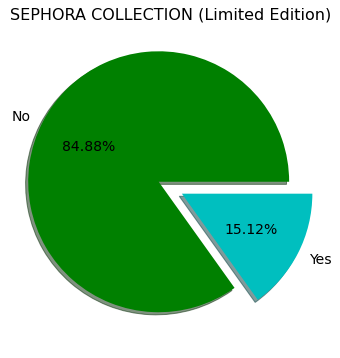

In [28]:
limitedsephora = pd.crosstab(index=dfsephora['brand'], columns = dfsephora['limited_edition'])
limitedsephora
nama = ["No", "Yes"]
plt.figure(figsize=(10,6))
plt.pie(limitedsephora.loc["SEPHORA COLLECTION"], labels=nama, 
        colors =["g","c"], autopct = '%1.2f%%', shadow=True,
        textprops={
           'size' : 14,
           'color' : 'black'
       }, explode = (0.1, 0.1))
plt.title("SEPHORA COLLECTION (Limited Edition)", size = 16)
plt.show()

In [29]:
dfsephora['limited_time_offer'].unique()
# Dapat dilihat, dari data limited time offer di SEPHORA COLLECTION tidak ada.

array([0], dtype=int64)

## Asumsi
- Per barang memiliki profit margin sebesar 30% setiap barang.
- Biaya Operasional (Sewa gedung, Listrik, Gaji Karyawan, dll) \$1500 per bulan.
- Hire Digital Marketing Specialist dengan biaya \$500 per bulan.
- Membuat Apps \$25.000.
- Setelah menggunakan Apps Online Store penjualan naik menjadi 20% per bulan.

### Menghitung Pendapatan SEPHORA melalui Brand SEPHORA COLLECTION "Sebelum" Menggunakan Aplikasi Online Store

In [30]:
a = dfsephora['price'].mean() # rata-rata harga penjualan barang
b = dfsephora['price'].count() # total transaksi selama sebulan
omsetsebulan = a * b
omsetsebulan # Rata-rata Omset SEPHORA melalui Brand SEPHORA COLLECTION selama sebulan $ 9097.95

9097.95

In [31]:
# Asumsi per barang memiliki profit margin sebesar 30% setiap barang.
pendapatan = omsetsebulan * 0.3
pendapatan

2729.385

In [32]:
# Asumsi biaya operasional $1500 per bulan
nett = pendapatan - 1500
nett
# Pendapatan bersih tiap bulan $1229.385 SEPHORA melalui Brand SEPHORA COLLECTION, tanpa Apps Store Online

1229.3850000000002

### Menghitung Pendapatan SEPHORA melalui Brand SEPHORA COLLECTION "Dengan" Menggunakan Aplikasi Online Store

In [33]:
omsetbarusebulan = a * (1.2*b)
omsetbarusebulan 
# Rata-rata Omset SEPHORA melalui Brand SEPHORA COLLECTION setelah menggunakan Apps selama sebulan $ 10917.539999

10917.539999999999

In [34]:
# Asumsi per barang memiliki profit margin sebesar 30% setiap barang.
pendapatanbaru = omsetbarusebulan * 0.3
pendapatanbaru

3275.2619999999997

In [35]:
# Asumsi biaya operasional $1500 per bulan ditambah dengan Hire Digital Marketing Specialist $500 per bulan
nettbaru = pendapatanbaru - 1500 - 500
nettbaru
# Pendapatan bersih tiap bulan $1275.26199 SEPHORA melalui Brand SEPHORA COLLECTION, dengan Apps Store Online

1275.2619999999997

In [36]:
persentase = (nettbaru - nett)/nett * 100
persentase.round(2)
# Ada peningkatan sebesar 3.73 % setelah penggunaan Apps Online Store

3.73

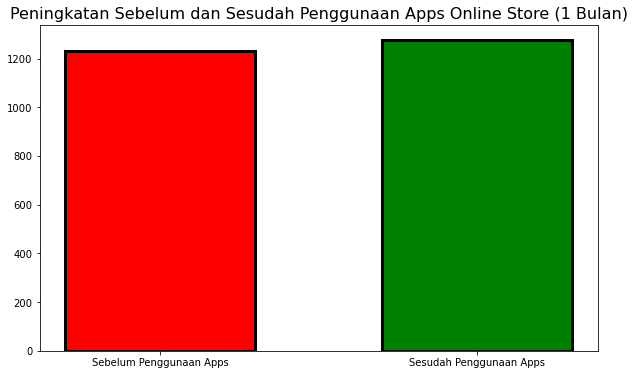

In [37]:
isi = ["Sebelum Penggunaan Apps", "Sesudah Penggunaan Apps"]
dapet = [nett, nettbaru]
x = pd.DataFrame(isi, columns = ["apps"])
y = pd.DataFrame(dapet, columns = ["nett"])
abc = pd.concat([x,y],axis=1)
abc
plt.figure(figsize=(10,6))
plt.bar(abc['apps'], abc['nett'],
       color=['r','g'], 
        edgecolor ='black', 
        linewidth = 3, width = 0.6)
plt.title("Peningkatan Sebelum dan Sesudah Penggunaan Apps Online Store (1 Bulan)", size = 16)
plt.show()

### Menghitung Waktu Balik Modal dengan Investasi penggunaan Apps Online Store

In [38]:
# Dengan anggapan kalau penjualan ini selalu stabil selama 1 bulan penuh seperti data pada bulan ini.
waktu = 25000/nettbaru
waktu
# Dibutuhkan waktu 19.603 bulan ~ 20 bulan untuk balik modal dengan Investasi penggunaan Apps Online Store SEPHORA
# jika penjualan selalu stabil setiap bulannya dan tidak ada faktor lain yang menurunkan penjualan.

19.603814745518964

### Menghitung Kolaborasi dengan Selebgram
- Asumsi Revenue meningkat dari Advertising Selebgram dan Apps Online Store melalui barang-barang Limited Edition dan Limited Time Offer sebesar 40 %.
- Asumsi Barang yang Limited Edition dan Limited Time Offer selama 1 bulan, dengan Fee Selebgram \$ 400.

In [39]:
omsetselebsebulan = a * (1.4*b)
omsetselebsebulan 
# Rata-rata Omset SEPHORA melalui Brand SEPHORA COLLECTION setelah menggunakan Apps selama sebulan $ 12737.13

12737.130000000001

In [40]:
# Asumsi per barang memiliki profit margin sebesar 30% setiap barang.
pendapatanselebbaru = omsetselebsebulan * 0.3
pendapatanselebbaru

3821.139

In [41]:
# Asumsi biaya operasional $1500 per bulan ditambah Hire Digital Marketing Specialist $500 per bulan dan Fee Selebgram $400
nettselebbaru = pendapatanselebbaru - 1500 - 500 - 400
nettselebbaru
# Pendapatan bersih tiap bulan $1521.139 SEPHORA melalui Brand SEPHORA COLLECTION, dengan Apps Store Online & Ads Selebgram

1421.1390000000001

In [42]:
persentase1 = (nettselebbaru - nett)/nett * 100
persentase1.round(2)
# Ada peningkatan sebesar 15.6 % setelah penggunaan Apps Online Store & Ads Selebgram

15.6

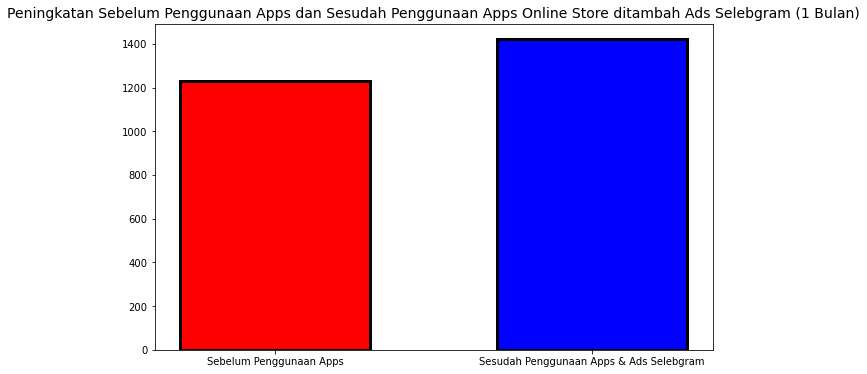

In [43]:
isi = ["Sebelum Penggunaan Apps", "Sesudah Penggunaan Apps & Ads Selebgram"]
dapet = [nett, nettselebbaru]
x = pd.DataFrame(isi, columns = ["apps"])
y = pd.DataFrame(dapet, columns = ["nett"])
abc = pd.concat([x,y],axis=1)
abc
plt.figure(figsize=(10,6))
plt.bar(abc['apps'], abc['nett'],
       color=['r','b'], 
        edgecolor ='black', 
        linewidth = 3, width = 0.6)
plt.title("Peningkatan Sebelum Penggunaan Apps dan Sesudah Penggunaan Apps Online Store ditambah Ads Selebgram (1 Bulan)", size = 14)
plt.show()

## Insight
- Berdasarkan data yang diperoleh, Penjualan Online SEPHORA pada Brand SEPHORA COLLECTION hanya ada 7,26% dan masih didominasi oleh penjualan Store Offline.
- Berdasarkan data yang diperoleh, Category yang Limited Edition pada Brand SEPHORA COLLECTION hanya ada 15,12% dan mayoritas masih penjualan yang ready stock.
- Belum ada Category yang Limited Time Offer pada Brand SEPHORA COLLECTION.
- Category yang paling diminati oleh Customers berdasarkan total number_of_reviews pada Brand SEPHORA COLLECTION ada 21 category dari 92 category, namun dari 21 category tersebut, ada 4 category yang memiliki rating dibawah rata-rata yaitu Lipstick, Facial Cleansing, Mascara, dan Face Primer. Namun, walaupun Lipstick memiliki rating dibawah rata-rata tetapi memiliki tingkat kesukaan (love) paling tinggi diantara seluruh Category pada Brand SEPHORA COLLECTION.
- Ada 42 category yang rating diatas rata-rata namun memiliki number_of_reviews yang dibawah rata-rata.
- Ada 29 category yang rating dibawah rata-rata dan memiliki number_of_reviews dibawah rata-rata.

## Conclusion & Recommendation
- Penjualan SEPHORA dapat ditingkatkan melalui penjualan Online dengan cara membuat Apps Online Store SEPHORA, selain meningkatkan penjualan SEPHORA juga dapat bersaing dengan kompetitor lain melalui kelebihan Apps Online Store yang dimiliki dan mempermudah bagi para pelanggan untuk berbelanja melalui Apps Online Store.
- Penjualan beberapa Category yang kurang diminati atau masih dibawah rata-rata number_of_reviews dapat ditingkatkan melalui Apps Online Store SEPHORA, berlaku juga untuk produk yang sudah diminati oleh para Customers, sehingga meningkatkan probability Customers untuk berbelanja. 
- Penjualan melalui Apps Online Store SEPHORA, jika dengan anggapan kalau total penjualan meningkat 20%, dapat meningkatkan pendapatan bersih sebesar 3.73% (sudah dikurangi oleh biaya operasional, dan lain lain).
- Apabila penjualan melalui Store dan Online Store SEPHORA pada Brand SEPHORA COLLECTION stabil setiap bulannya dan tidak ada faktor lain yang menurunkan penjualan, maka untuk Investasi Apps Online Store SEPHORA dapat balik modal selama 20 bulan.
- Untuk meningkatkan rating yang masih dibawah rata-rata maka dilakukan riset terhadap Customers dengan memberikan kuesioner setelah pembelian barang, agar pihak SEPHORA dapat mengetahui kelebihan produk dan kekurangan produk serta kritik dan saran dari Customers, supaya pihak SEPHORA dapat mengembangkan bagian yang masih perlu diperbaiki. Agar terjadi komunikasi yang sehat antara Customers dan pihak SEPHORA.
- Produk/Category yang lovenya cukup tinggi contohnya seperti Lipstick dapat dibuatkan Produk yang Limited Time Offer & Limited Edition, sehingga Customers yang suka dengan Category tersebut dapat mempertimbangkan untuk melakukan pembelian pada barang tersebut, dikarenakan barang yang ia sukai sedang Limited Time Offer & Limited Edition. Hal ini bisa dikolaborasi dengan Selebgram (Limited Edition by Selebgram).
- Dengan Asumsi agar Selebgram mengiklankan supaya followersnya berbelanja melalui Apps Online Store SEPHORA sehingga total penjualan meningkat menjadi 40%, dapat meningkatkan pendapatan bersih sebesar 15.6% (Selama Event Limited Time Offer & Limited Edition berjalan selama sebulan).